# Machine Learning

Machine Learning is a field of Artificial Intelligence that comprises building general-purpose machines that specialize when they learn from data. But, what does "learn from data" mean?

Machine Learning can be seen as a mixture of statistics and linear algebra - although statistics definitely plays a more important role here.

When we build models from data, we are assuming that this data is comprised of samples that come some unknown distribution. We can call our samples $x$ and our distribution $X$, so that:

$$
x \sim P(X)
$$

If we knew the distribution $P(X)$, we could estimate, for example, the probability that a sample has some value or range of values (for example: $P(a \leq x \lt b)$), and this could be very useful. For example, if we could reliably find the distribution of gains for a particular trading strategy, we would be able to know the probability of gaining between $a$ and $b$ amounts in a particular day. Then, we could make a call on whether or not the potential gains of implementing that strategy would surpass its risks and inherent cost.

The problem is that is it usually very hard to find the distribution $P(X)$.

In fact, even if we *knew* the distribution is normal, and if we *knew* its variance, just estimating its mean would be a difficult task. Let's take a closer look.

## The Central Limit Theorem

The Central Limit Theorem (CLT) states that, if we have a sample $x$ of size $n$, independently drawn from a distribution with mean $\mu$ and variance $\sigma^2$, then the sample mean $\bar{x}$ of $x$ follows a normal distribution, as:

$$
\bar{x} \sim N(\mu, \frac{\sigma^2}{N})
$$

Check this demonstration:

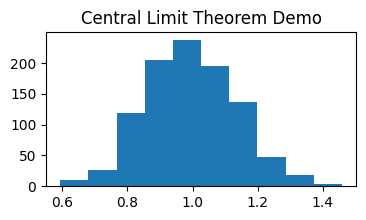

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

calculated_x_bar = []
for i in range(1000):
    x = np.random.exponential(size=(50,)) # Get 50 samples from a distribution
    xbar = np.mean(x) # Calculate the sample mean
    calculated_x_bar.append(xbar) # Same the sample mean

plt.figure(figsize=(4,2))
plt.hist(calculated_x_bar) # This is the histogram of sample means
plt.title('Central Limit Theorem Demo')
plt.show()

What this is showing is that, even if we *knew* the distribution that is generating data, we still struggle to estimate its parameters from data.

In fact, if we estimate our distribution mean twice, we could get values from $0.6$ to $1.4$, which is a huge difference, considering that the true value is $1$.

## We need more data

You have probably heard people claiming that using more data is *better*. This could be true. In fact, we can show it. According to the central limit theorem, the estimated mean of our samples is:

$$
\bar{x} \sim N(\mu, \frac{\sigma^2}{N})
$$

which means that increasing $N$ leads to decreasing the sample variance of $\bar{x}$, thus $\bar{x}$ is more likely to be closer to the mean.

Let's view it in practice:

**Exercise: get MORE data!**

Go back to the code excerpt above demonstrating the CLT. What happens if we increase the number of samples acquired in each round? Is it the predicted effect of the CLT?

## We need ~~more~~ BETTER data

In fact, increasing the number of data points is usually a very good way to increase the accuracy of our estimates. However, sometimes that is simply not possible: we cannot increase a village's population, the size of a classroom, we cannot redo the historical process that lead countries to be where they are, we cannot find arbitrarily more customers or users to a product, and so on.

If we look at the CLT again:

$$
\bar{x} \sim N(\mu, \frac{\sigma^2}{N})
$$

we can see that, instead of increasing $N$, we could decrease $\sigma$. In practice, this means: "we will estimate distributions by sampling features that make more sense towards our problem". For example: we could make a model for the height of all students in our class. However, we could actually break down our students according to, for example, some grouping process. We might find that dividing our data among male and female students, for example, could lead to groups with significantly lower variance.

But, note - in this case, we are not estimating $P(X)$ anymore. Rather, we are assuming each element in our sample has a property called "class". We will model our class as another random variable, $C$, and in this case it can assume two different values: $c_1$ for male, or $c_2$ for female. Thus, we are actually estimating a *conditional* distribution, that is, our samples $x$ are drawn from:

$$
x \sim P(X | C)
$$

Thus, we sample from the distribution while *knowing* the class for each element of the group.

## Bayes' Theorem

Remember Bayes' Theorem? This is it:

$$
P(X|C) P(C) = P(C|X) P(X)
$$

In fact, that means that, given an observation $X$, we can calculate the probability of that element having class $C$, as:

$$
P(C|X) = \frac{P(X|C) P(C)}{P(X)}
$$

So we can have an idea here: we could *observe* parameters $X$ for an element of our dataset, and then estimate the probability $P(C|X)$ for each possible class. For such, we need to have had first estimated $P(X|C)$, $P(X)$ and $P(C)$. To estimate them, we need:

* A sample that is representative of the population you want to estimate the distribution on
* Labels (defining the class) for each element of that sample

If the distributions are discrete, then we can simply estimate the probabilities by counting.

## Application: sentiment analysis

Not rarely, companies (and, nowadays, influencers and governments) wish to know if people are saying unpleasant things about them online. For this exercise, I have created a fictional company called FinMonday, which is a fintech we use on our classes on Monday mornings. FinMonday has had a series of victories in the recent news, but also a series of accusations of fraud. Our fictional intern gathered and labeled some news about FinMonday:

In [3]:

import pandas as pd 
news = [{
    "news":
    "FinMonday achieves a major gain in the fintech sector, surpassing revenue expectations for the third quarter.",
    "sentiment": "positive"
}, {
    "news":
    "A strategic partnership with global banks marks another victory for FinMonday, solidifying its position as a market leader.",
    "sentiment": "positive"
}, {
    "news":
    "FinMonday celebrates a victory after its latest AI-driven investment tool gains widespread industry adoption.",
    "sentiment": "positive"
}, {
    "news":
    "Victory for FinMonday as the company secures regulatory approval for its innovative blockchain-based transactions.",
    "sentiment": "positive"
}, {
    "news":
    "FinMonday reports record profits, marking a significant victory for investors and stakeholders alike.",
    "sentiment": "positive"
}, {
    "news":
    "Another victory for FinMonday as it expands its market presence to Europe, increasing its global footprint.",
    "sentiment": "positive"
}, {
    "news":
    "FinMonday's stock price surges after a victory in court clears the company of previous legal uncertainties.",
    "sentiment": "positive"
}, {
    "news":
    "A major victory for FinMonday as customer satisfaction reaches an all-time high, according to a new survey.",
    "sentiment": "positive"
}, {
    "news":
    "FinMonday's strategic acquisition of a promising startup is seen as a victory that will fuel further innovation.",
    "sentiment": "positive"
}, {
    "news":
    "Victory for FinMonday as its mobile banking app receives top ratings and recognition from industry experts.",
    "sentiment": "positive"
}, {
    "news":
    "FinMonday secures a major investment, marking a financial victory that boosts its expansion plans.",
    "sentiment": "positive"
}, {
    "news":
    "A victory for FinMonday as its CEO is recognized as one of the top leaders in the financial industry.",
    "sentiment": "positive"
}, {
    "news":
    "FinMonday achieves another victory by successfully launching its new line of AI-driven financial services.",
    "sentiment": "positive"
}, {
    "news":
    "Investors celebrate a victory as FinMonday's quarterly earnings exceed all market forecasts.",
    "sentiment": "positive"
}, {
    "news":
    "FinMonday's commitment to sustainability leads to a victory, winning an award for green financial initiatives.",
    "sentiment": "positive"
}, {
    "news":
    "FinMonday faces allegations of fraud as authorities investigate suspicious transactions linked to offshore accounts.",
    "sentiment": "negative"
}, {
    "news":
    "Reports emerge of a possible fraud scandal involving FinMonday, leading to increased regulatory scrutiny.",
    "sentiment": "negative"
}, {
    "news":
    "FinMonday's reputation takes a hit after whistleblower allegations reveal potential financial fraud.",
    "sentiment": "negative"
}, {
    "news":
    "Investors worry as FinMonday's name surfaces in a large-scale fraud investigation led by federal agencies.",
    "sentiment": "negative"
}, {
    "news":
    "A lawsuit accuses FinMonday of fraud, claiming the company misled clients about its investment strategies.",
    "sentiment": "negative"
}]


news_df = pd.DataFrame(news)
news_df.head()


,news,sentiment
0,FinMonday achieves a major gain in the fintech...,positive
1,A strategic partnership with global banks mark...,positive
2,FinMonday celebrates a victory after its lates...,positive
3,Victory for FinMonday as the company secures r...,positive
4,"FinMonday reports record profits, marking a si...",positive


Calculate:

* $P(C=\text{positive})$
* $P(C=\text{negative})$

Now, assume the element we are observing is the presence of the word "fraud". Calculate:

* $P(f) = P(\text{has the word 'fraud'})$
* $P(f') = P(\text{does not the word 'fraud'})$

Then, estimate:

* $P(f | C=\text{positive})$
* $P(f' | C=\text{negative}) $

Last, let's extrapolate the questions:

1. Suppose a news piece contains the word fraud. Should we consider it negative news?
1. Suppose a news piece does not have the word fraud. Should we consider it positive news?


In [4]:
# Make your solution here



## The Naive Bayes approach

Of course, in this case, we knew we should be looking at the word "fraud". However, in real life, we could be looking at many words - many of which are ambiguous.

A naive way of dealing with that is assuming that:

1. The occurrence of each word is independent of the other words
1. The number of occurences of each word follows a multinomial distribution
1. The order of words does not matter, only their presence

Condition 1 leads to the Naive Bayes formulation, which is similar to the usual Bayesian formulation, but with many independent variables as conditions for the class.

Condition 2 leads to assuming that we need a Multinomial prior in our distribution.

Condition 3 leads to using an approach called bag-of-words. In the bag-of-words approach, each word is mapped to a position in a vector. Then, the value in that position is the count of occurrences of that word in the text. In the bag-of-words approach, each text in the collection is considered a collection of words, that is, the order of words is completely disregarded.

We don't really want to re-implement all of this. Instead, we will use scikit-learn:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data, transform the test data
X = vectorizer.fit_transform(news_df['news'])

# Initialize the Multinomial Naive Bayes model
clf = MultinomialNB()

# Train the model
clf.fit(X, news_df['sentiment'])

# Predict the probability for each class in each news piece:
y_pred = clf.predict_proba(X)

print(y_pred)

[[3.08734098e-04 9.99691266e-01]
 [8.38511701e-06 9.99991615e-01]
 [3.95440738e-04 9.99604559e-01]
 [3.35396243e-05 9.99966460e-01]
 [7.80250876e-04 9.99219749e-01]
 [6.03729842e-06 9.99993963e-01]
 [3.37062601e-03 9.96629374e-01]
 [3.35396243e-05 9.99966460e-01]
 [5.91504387e-04 9.99408496e-01]
 [1.67700934e-05 9.99983230e-01]
 [2.28999856e-04 9.99771000e-01]
 [2.90539459e-06 9.99997095e-01]
 [2.10392871e-04 9.99789607e-01]
 [1.16124698e-03 9.98838753e-01]
 [3.49441895e-04 9.99650558e-01]
 [9.99980404e-01 1.95959845e-05]
 [9.99970683e-01 2.93173437e-05]
 [9.99902789e-01 9.72108781e-05]
 [9.99987269e-01 1.27313536e-05]
 [9.99583506e-01 4.16494245e-04]]


## Accuracy, and train and test sets

We have estimated $P(C|X)$. However, this estimate was done on a *sample*. If we wish to understand how much it generalizes to the population (or: to unseen samples), we should test how well it works in *another sample*.

To check "how well it works", we actually compute the accuracy of the prediction. That is: we choose the most likely class from our predictor - how often is our machine correct?

To get *another* population, we need to break our dataset into two datasets: one for training the model, and another one for testing the model.

Both of these are already implemented in scikit-learn:

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_train, df_test = train_test_split(news_df, test_size=0.2, random_state=2)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data, transform the test data
X = vectorizer.fit_transform(df_train['news'])
X_test = vectorizer.transform(df_test['news'])

# Initialize the Multinomial Naive Bayes model
clf = MultinomialNB()

# Train the model
clf.fit(X, df_train['sentiment'])

# Predict the probability for each class in each news piece:
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(df_test['sentiment'], y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.75


Ok, now we are getting to a problem. Our dataset is getting *too small* to make an adequate evaluation. We are definitely biasing our model!

Now, ok - we need *more* data.

Let's leave FinMonday behind. The code below loads the IMDB dataset, which is a famous dataset containing movie reviews. They are tagged as positive and negative.

**Exercise: adapt the codes above to get a prediction accuracy score in the IMDB dataset**

Remember to:

1. Identify what column of the dataframe contains text and what column contains labels
1. Split your data into train and test sets
1. Train your model in the train set
1. Test your model in the test set
1. Report accuracy. It will probably be between $0.8$ and $0.9$.


In [18]:
!pip install kagglehub
import kagglehub
path = kagglehub.dataset_download("columbine/imdb-dataset-sentiment-analysis-in-csv-format")

In [19]:
df = pd.read_csv(path + "/Train.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [24]:
# Make your code here


In [ ]:
# This is my solution, but do NOT copy it! Try to solve it on your own first.







from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data, transform the test data
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

# Initialize the Multinomial Naive Bayes model
clf = MultinomialNB()

# Train the model
clf.fit(X_train, df_train['label'])

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(df_test['label'], y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


## Review and exercises

At this point, you should be ok with:

* Splitting data into train and test
* Using a vectorizer
* Using a Multinomial Naive Bayes machine
* Reporting accuracy

Now, let's proceed to some exercises:

In [ ]:
# Challenge 1
# Find another dataset on Kaggle that contains text data and labels. 
# Use the Naive Bayes classifier to predict the labels of the text data. 
# Report the accuracy of your model.

In [ ]:
# Challenge 2
# What happens to the classification accuracy if we shuffle the words in a text document?

In [26]:
# Challenge 3
# Choose one topic that has been in the news lately.
# Download news about that topic from a news website or use a news API to get the latest news.
# Use Excel or another spreadsheet program to label the news as positive or negative.
# Use the Naive Bayes classifier to predict the sentiment of the news.
# Report the accuracy of your model.
